## 5) (Continued from the DataCleaning Notebook ... ) Modeling!!

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('../data/cars.csv')

In [13]:
#double checking this new cleaned data file looks as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 12 columns):
Name                 5806 non-null object
Location             5806 non-null object
Year                 5806 non-null int64
Kilometers_Driven    5806 non-null int64
Is_Diesel            5806 non-null int64
Is_Manual            5806 non-null int64
Number_Owners        5806 non-null int64
Mileage-kmpl         5806 non-null float64
Engine-cc            5806 non-null int64
Power-bhp            5806 non-null float64
Seats                5806 non-null int64
Price                5806 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 544.4+ KB


In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Is_Diesel,Is_Manual,Number_Owners,Mileage-kmpl,Engine-cc,Power-bhp,Seats,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,1,19.67,1582,126.20,5,12.50
1,Honda Jazz V,Chennai,2011,46000,0,1,1,18.20,1199,88.70,5,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,1,1,1,20.77,1248,88.76,7,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,1968,140.80,5,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,1,1,1,23.08,1461,63.10,5,3.50


### Dummy Variables 

We have some catagorical variables, that won't play nice with our linear modeling, so first things first, let's set up some dummy variables for these.

In [15]:
#How many locations do we have? 
df['Location'].value_counts()

Mumbai        757
Hyderabad     709
Kochi         637
Coimbatore    629
Pune          581
Delhi         535
Kolkata       521
Chennai       473
Jaipur        400
Bangalore     347
Ahmedabad     217
Name: Location, dtype: int64

In [16]:
#There are too many individual car types but, Brand might be an interesting factor to consider in the model.
df['Brand'] = df['Name'].map(lambda x: x.split()[0])

In [17]:
#Making dummy variables for Location, Brand and Number of Seats. 
#Other variables are either already binary or continuous
df_dummies = pd.get_dummies(df, columns = ['Brand', 'Location', 'Seats'], drop_first=True)

In [18]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 56 columns):
Name                   5806 non-null object
Year                   5806 non-null int64
Kilometers_Driven      5806 non-null int64
Is_Diesel              5806 non-null int64
Is_Manual              5806 non-null int64
Number_Owners          5806 non-null int64
Mileage-kmpl           5806 non-null float64
Engine-cc              5806 non-null int64
Power-bhp              5806 non-null float64
Price                  5806 non-null float64
Brand_Audi             5806 non-null uint8
Brand_BMW              5806 non-null uint8
Brand_Bentley          5806 non-null uint8
Brand_Chevrolet        5806 non-null uint8
Brand_Datsun           5806 non-null uint8
Brand_Fiat             5806 non-null uint8
Brand_Force            5806 non-null uint8
Brand_Ford             5806 non-null uint8
Brand_Honda            5806 non-null uint8
Brand_Hyundai          5806 non-null uint8
Brand_ISUZU            580

### Setting up our Data for Modeling

In [19]:
#Creating our x and y for modeling
y = df_dummies.Price
X = df_dummies.drop(columns=['Name', 'Price'], axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [20]:
# Spliting our data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Linear regression model
Using the using X_train median for any missing values 

In [75]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute any missing values with median value from the X_train dataset using SimpleImputer
impute = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(impute.fit_transform(X_train))
X_test_imputed = pd.DataFrame(impute.transform(X_test))

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg.score(X_train_imputed, y_train))
print('Test r^2:', linreg.score(X_test_imputed, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_imputed)))
print('Test MSE:', mean_squared_error(y_test, linreg.predict(X_test_imputed)))

Training r^2: 0.7916985025917374
Test r^2: 0.7733207062955831
Training MSE: 26.59288921920093
Test MSE: 28.3120881680343


In [77]:
X_test_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2014.0,20600.0,0.0,1.0,1.0,21.10,814.0,55.20,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2012.0,51000.0,1.0,0.0,1.0,11.74,2987.0,254.80,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2010.0,73513.0,0.0,1.0,1.0,19.70,796.0,46.30,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2017.0,4700.0,0.0,1.0,1.0,25.17,799.0,53.30,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2018.0,17000.0,0.0,1.0,1.0,18.60,1197.0,81.83,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Whoa! Way better than I expected, let's check out the full report from OLS.
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X_train_imputed)
results = OLS(y_train, X).fit()
results.summary()

NameError: name 'X_train_imputed' is not defined

In [53]:
linreg.coef_

array([ 9.47241774e-01, -2.13219955e-05,  1.52942960e+00,  1.39930647e-01,
       -3.20731235e-01, -1.45995157e-01,  1.24154829e-03,  8.12723086e-02,
       -3.49603703e-01, -4.65909497e-01,  1.37000658e+00, -9.25056065e+00,
       -1.09863061e+01, -9.59361585e+00, -1.21448733e+01, -8.41063498e+00,
       -9.21782192e+00, -8.79467239e+00, -1.41730451e+01, -9.90699138e+00,
        6.99340638e+00, -7.76619940e+00,  4.58265434e+01,  1.34980613e+01,
       -1.20999934e+01, -7.66952873e+00,  9.58367232e-01,  2.09973541e+00,
       -8.61531881e+00, -9.03949367e+00,  1.15419742e+01, -9.32788397e+00,
       -8.80788320e+00, -1.07751544e+01, -7.57526567e+00, -9.30877897e+00,
       -5.57007182e+00,  2.17502946e+00,  1.69458943e+00,  2.18893580e+00,
       -3.19933427e-01,  2.12863994e+00,  1.10499676e+00,  2.58505845e-02,
       -9.21116824e-01, -4.46474875e-01,  8.61962391e-01, -1.40268489e+01,
       -1.91881921e+01, -1.77689666e+01, -1.78074721e+01, -1.76622011e+01,
       -1.75826914e+01, -

### Normalizing data with Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

# Fit the model 
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_imputed_scaled, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg_norm.score(X_train_imputed_scaled, y_train))
print('Test r^2:', linreg_norm.score(X_test_imputed_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
print('Test MSE:', mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))

Training r^2: 0.7916985025917368
Test r^2: 0.773320706295679
Training MSE: 26.592889219201005
Test MSE: 28.31208816802232


In [60]:
linreg_norm.coef_

array([ 2.98205356, -0.79717549,  0.76221164,  0.06360386, -0.14320013,
       -0.6291614 ,  0.74047237,  4.37124465, -0.068289  , -0.09636624,
        0.02076006, -1.27242798, -0.47049295, -0.59829183, -0.31868361,
       -1.78563769, -2.81708609, -3.40427342, -0.30369258, -0.15012316,
        0.58799523, -0.38986242,  0.69442126,  1.35004406, -2.574832  ,
       -3.02086495,  0.21612254,  0.12705183, -0.567877  , -1.11267883,
        0.6297356 , -1.49580624, -1.45934237, -1.8406926 , -1.948031  ,
       -2.12025533, -0.30390577,  0.51631869,  0.46134139,  0.67478545,
       -0.09292708,  0.68101929,  0.28626271,  0.00802178, -0.2707764 ,
       -0.15037411,  0.2597985 , -1.78879789, -7.05227889, -1.17123785,
       -5.65764636, -2.60671826, -0.3767527 , -0.40164415])

Not much of a difference, let's try some regularization and see if we can zero out any of these coefficients

### Lasso Model

In [29]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv = 5) # Lasso is also known as the L1 norm 
lasso.fit(X_train_imputed_scaled, y_train)

print('Training r^2:', lasso.score(X_train_imputed_scaled, y_train))
print('Test r^2:', lasso.score(X_test_imputed_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_imputed_scaled)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test_imputed_scaled)))

Training r^2: 0.7912224264606891
Test r^2: 0.7741654778825127
Training MSE: 26.653667658004274
Test MSE: 28.20657677676366


In [33]:
lasso.coef_

array([ 2.95605222, -0.79118464,  0.70395642,  0.02246527, -0.125099  ,
       -0.55267695,  0.7537817 ,  4.4723364 ,  1.5437756 ,  1.59732866,
        0.12479953, -0.10747433, -0.10066758, -0.06028988, -0.09061402,
        0.        , -0.25619498, -0.14179329, -0.1108108 , -0.01514659,
        1.27758783,  0.02374358,  0.85928643,  2.17397921, -0.78248406,
        0.28533047,  2.09025414,  0.61653585, -0.00984318, -0.06488874,
        1.07218635, -0.13222456, -0.06888534, -0.38828968,  0.19343517,
       -0.18979089,  0.13865262,  0.47956886,  0.42086833,  0.633276  ,
       -0.11643106,  0.63997379,  0.2436452 , -0.01549091, -0.29356258,
       -0.19215732,  0.21001921, -1.27202948, -5.57132833, -0.89389168,
       -4.35518023, -1.98181078, -0.27947522, -0.28295508])

Basically the same again ... only zero'd one out. 

### Ridge Model

In [30]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5) # Ridge is also known as the L2 norm
ridge.fit(X_train_imputed_scaled, y_train)

print('Training r^2:', ridge.score(X_train_imputed_scaled, y_train))
print('Test r^2:', ridge.score(X_test_imputed_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_imputed_scaled)))
print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test_imputed_scaled)))

Training r^2: 0.7916978561949749
Test r^2: 0.7733360033050645
Training MSE: 26.59297174168738
Test MSE: 28.3101775820515


In [32]:
ridge.coef_

array([ 2.98162339, -0.79757941,  0.76208631,  0.06361115, -0.1427836 ,
       -0.62909119,  0.74165491,  4.37033407,  0.04535168,  0.02397526,
        0.02954018, -1.19249877, -0.44557662, -0.56201951, -0.30345448,
       -1.66228416, -2.63943063, -3.17922007, -0.29124982, -0.14132822,
        0.6369945 , -0.36063142,  0.70389612,  1.40812757, -2.45124764,
       -2.79186087,  0.3473767 ,  0.16224195, -0.52966414, -1.04113245,
        0.66164095, -1.40252063, -1.36303093, -1.74137992, -1.79879257,
       -1.98784424, -0.27218879,  0.51620478,  0.46161381,  0.67476846,
       -0.0929829 ,  0.68092905,  0.28612999,  0.0080533 , -0.27083309,
       -0.15055925,  0.25961014, -1.78282396, -7.03490741, -1.16808284,
       -5.64257544, -2.59978077, -0.37576022, -0.40046592])

Wow! Ok, so, given what we have seen, all these models are performing similarily, let's zip up all these coeffiencents into a dataframe to see what might be interesting to investigate further. 

### What variables are really influencing things here?

In [52]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Is_Diesel', 'Is_Manual', 'Number_Owners',
       'Mileage-kmpl', 'Engine-cc', 'Power-bhp', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Seats_4',
       'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9', 'Seats_10'],
      dtype='object')

In [61]:
# Converting all these coefficients into pandas Dataframe, to see which variables are influencing our model. 
coef_list = list(zip(X_train.columns, linreg.coef_, linreg_norm.coef_, lasso.coef_, ridge.coef_))
coef_df = pd.DataFrame(coef_list, columns = ['Variables', 'Naive', 'Normalized', 'Lasso', 'Ridge'])
coef_df

,Variables,Naive,Normalized,Lasso,Ridge
0,Year,0.947242,2.982054,2.956052,2.981623
1,Kilometers_Driven,-0.000021,-0.797175,-0.791185,-0.797579
2,Is_Diesel,1.529430,0.762212,0.703956,0.762086
3,Is_Manual,0.139931,0.063604,0.022465,0.063611
4,Number_Owners,-0.320731,-0.143200,-0.125099,-0.142784
5,Mileage-kmpl,-0.145995,-0.629161,-0.552677,-0.629091
6,Engine-cc,0.001242,0.740472,0.753782,0.741655
7,Power-bhp,0.081272,4.371245,4.472336,4.370334
8,Brand_Audi,-0.349604,-0.068289,1.543776,0.045352
9,Brand_BMW,-0.465909,-0.096366,1.597329,0.023975


## 6) Assumptions of Normality
There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

(i) linearity and additivity of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b) The slope of that line does not depend on the values of the other variables.

    (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

(ii) statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

(iii) homoscedasticity (constant variance) of the errors

    (a) versus time (in the case of time series data)

    (b) versus the predictions

    (c) versus any independent variable

(iv) normality of the error distribution.

Source: http://people.duke.edu/~rnau/testing.htm

## 7) Perhaps some visualizations will make things clearer. 

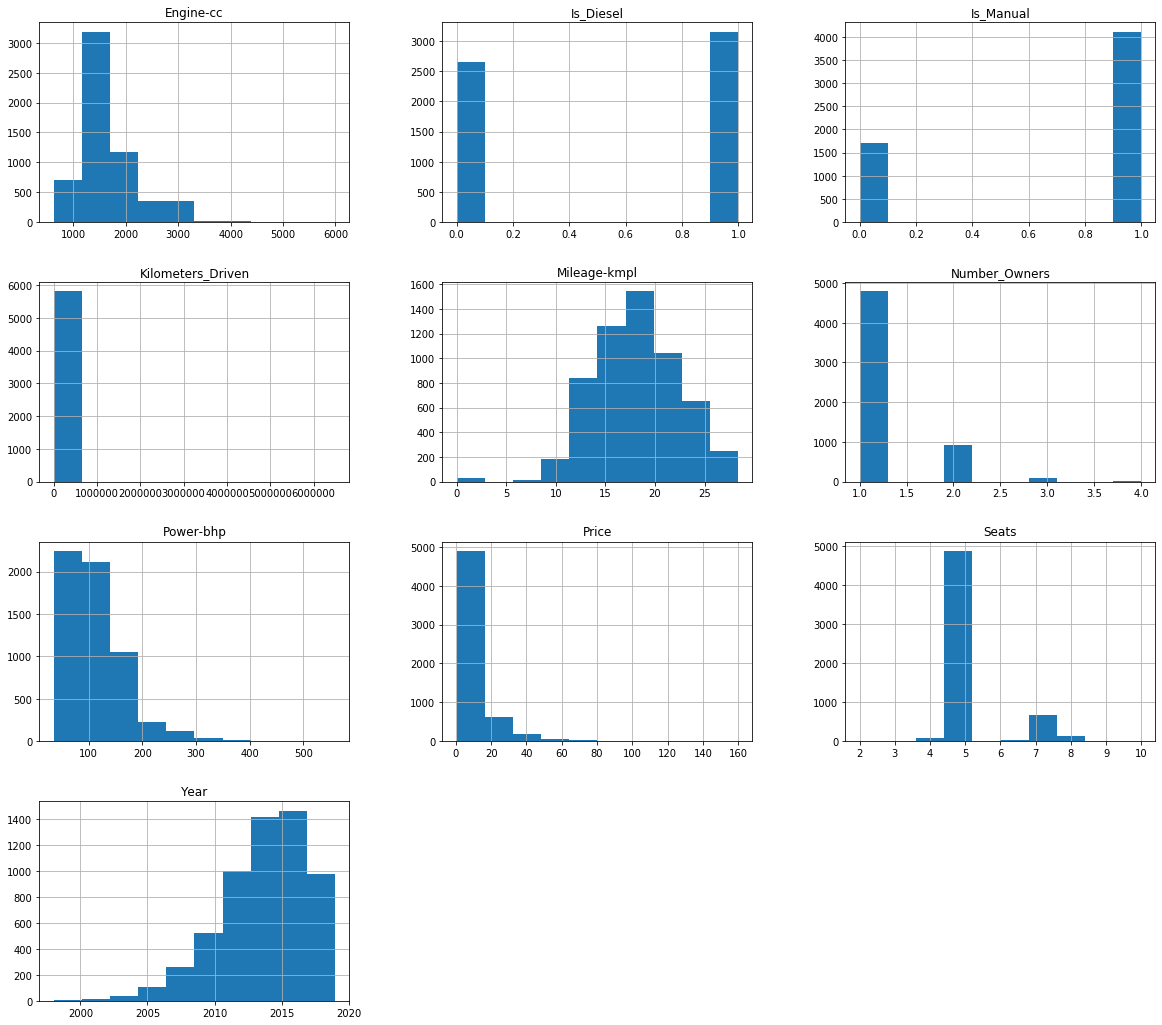

In [14]:
df.hist(figsize = (20,18));

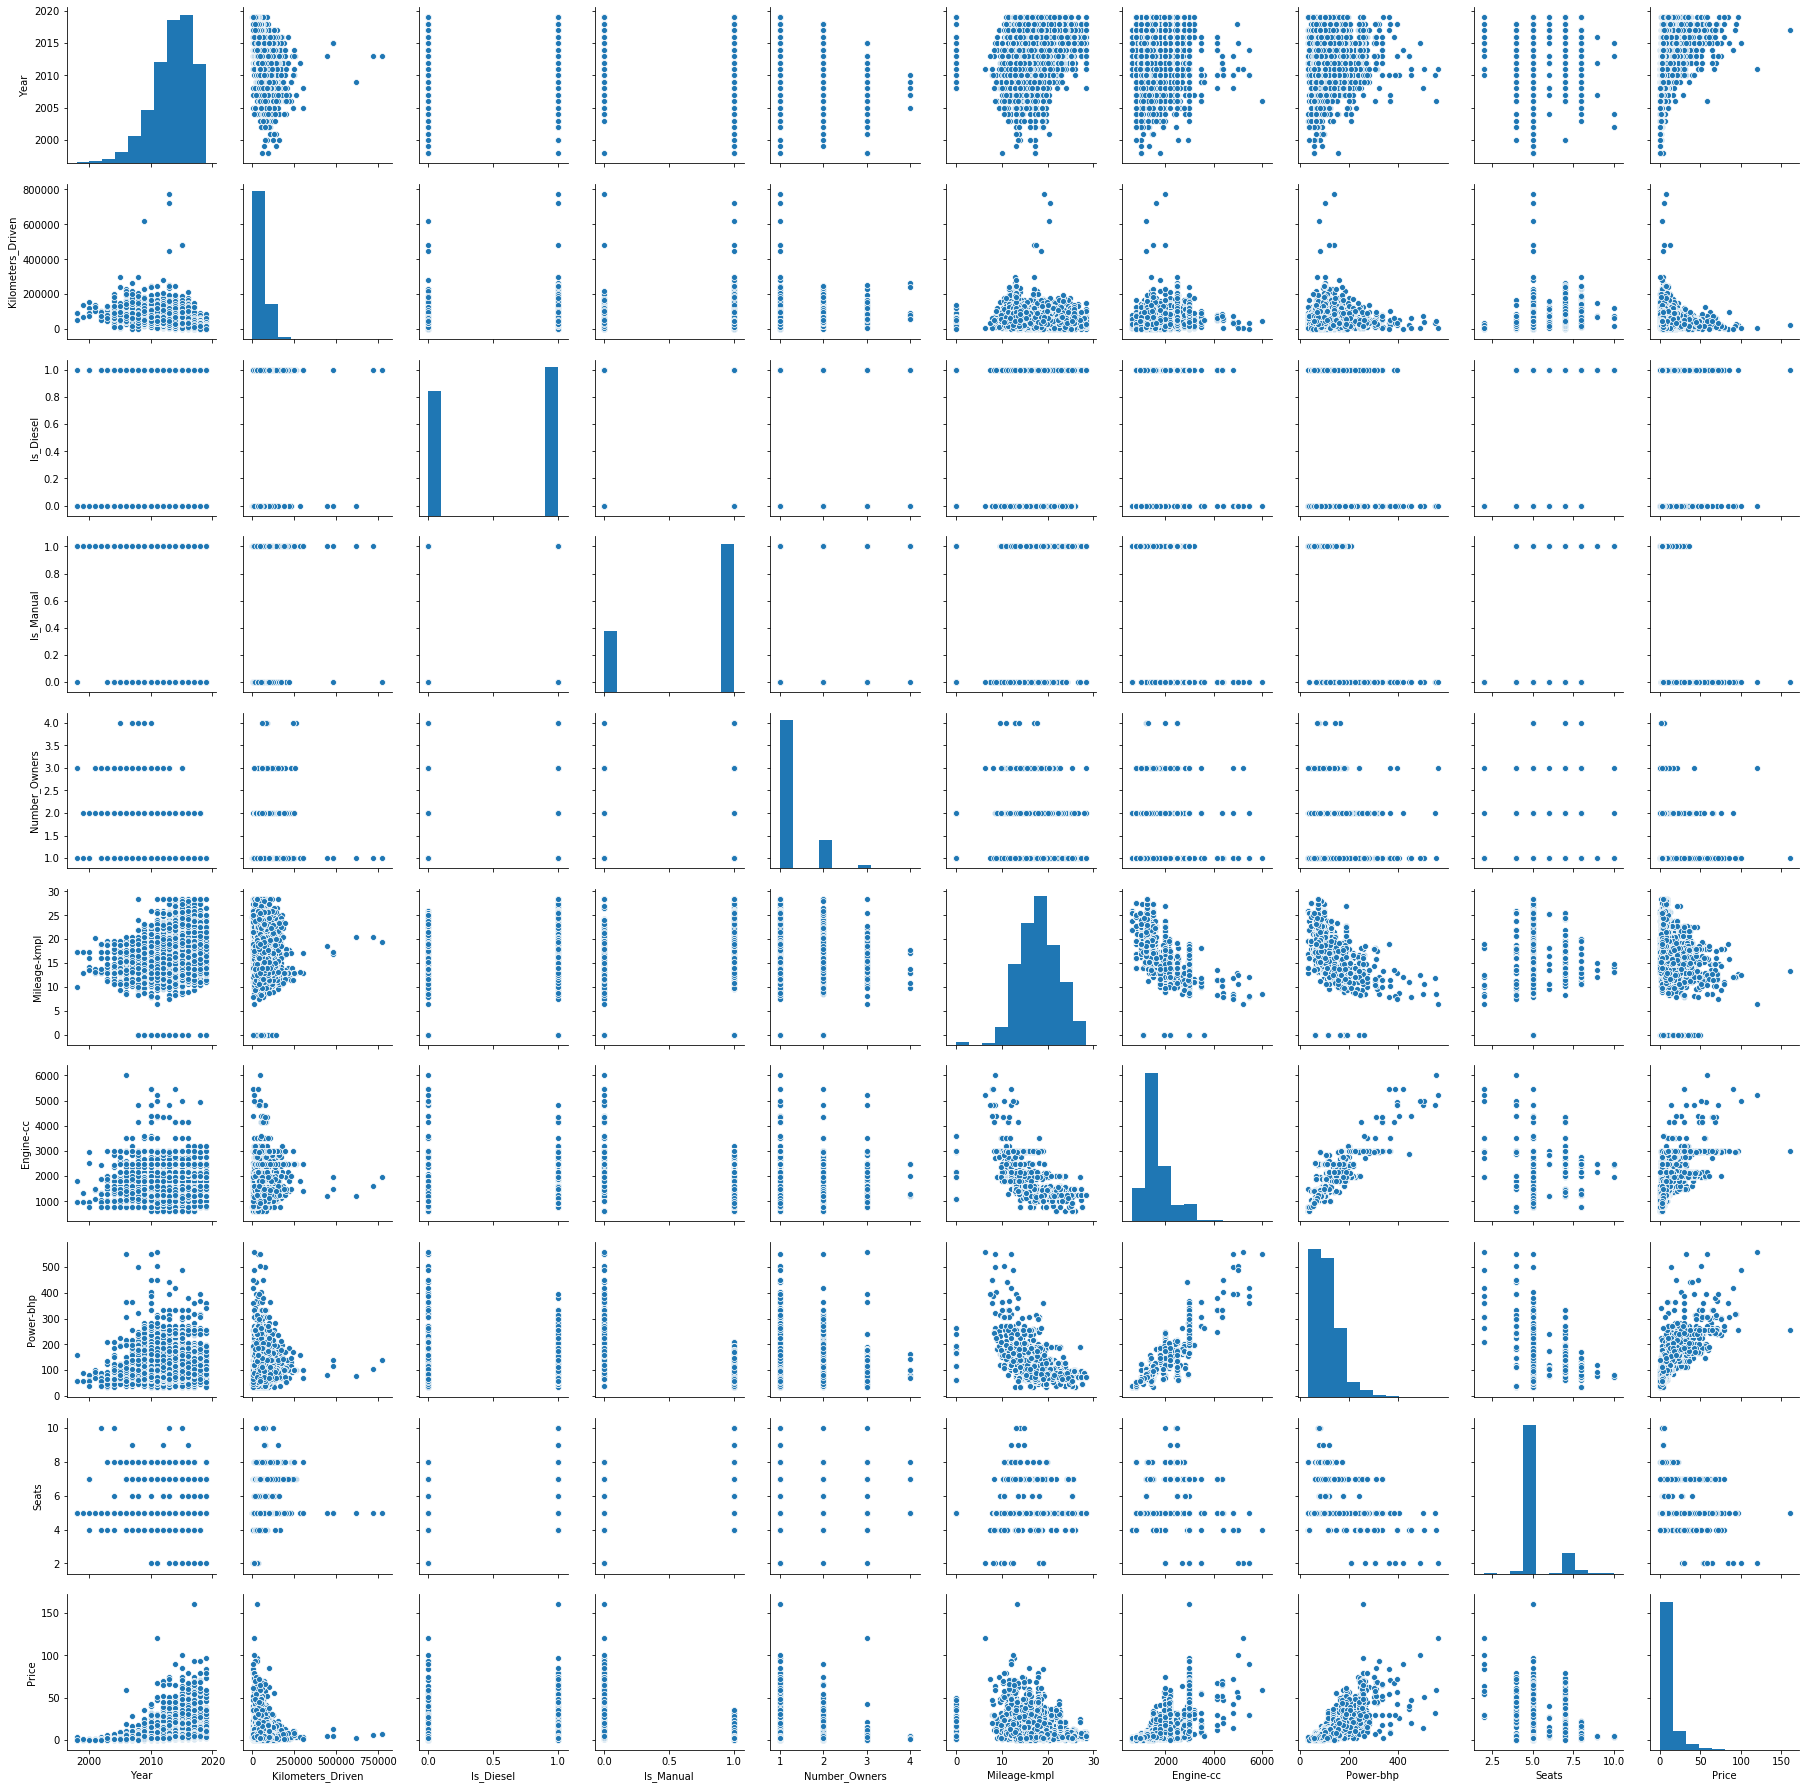

In [25]:
sns.pairplot(df2)
plt.show()

In [ ]:
## let's plot df

sns.scatterplot(df['Newspaper'], df['Sales'])

plt.xlabel('Newspaper ad budget')

plt.ylabel('Sales')
plt.show()